In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def ConvertColor(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
captures = cv2.VideoCapture(r"C:\Users\HP\Desktop\Images\vtest.avi") #0 ---> to open camera

In [10]:
frames_get = captures.get(cv2.CAP_PROP_FRAME_COUNT) * np.random.uniform(size = 30)

In [12]:
frames = []
for i in frames_get:
    captures.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, frame = captures.read()
    frames.append(frame)
captures.release()

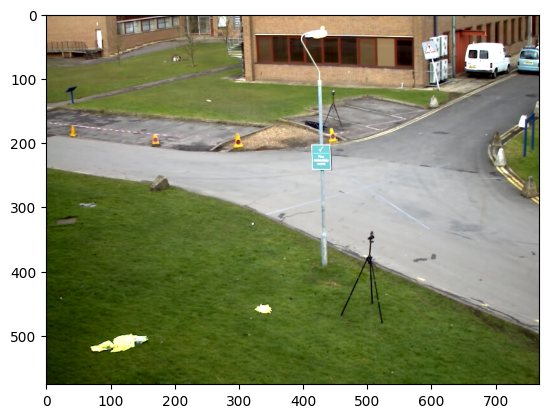

In [7]:
frame_median = np.median(frames, axis = 0).astype(dtype = np.uint8)
plt.imshow(ConvertColor(frame_median))

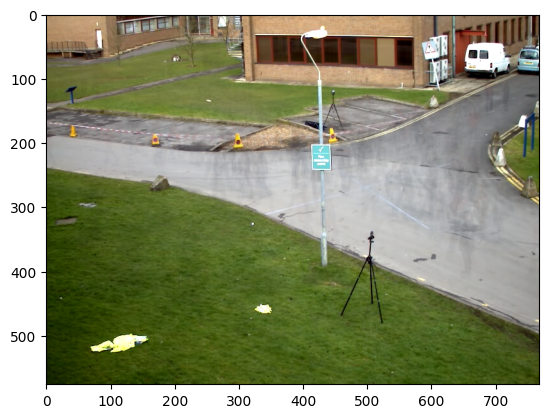

In [8]:
frame_mean = np.average(frames, axis = 0).astype(dtype = np.uint8)
plt.imshow(ConvertColor(frame_mean))

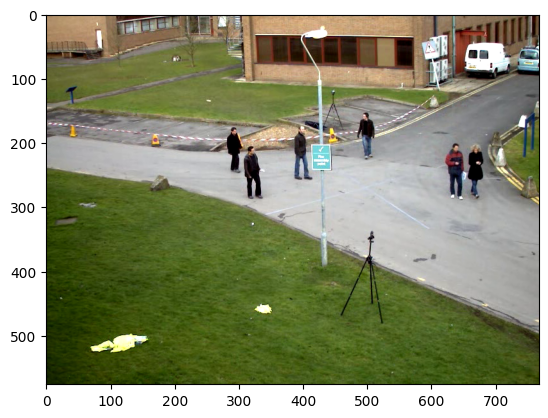

In [11]:
frame = frames[1]
plt.imshow(ConvertColor(frame))

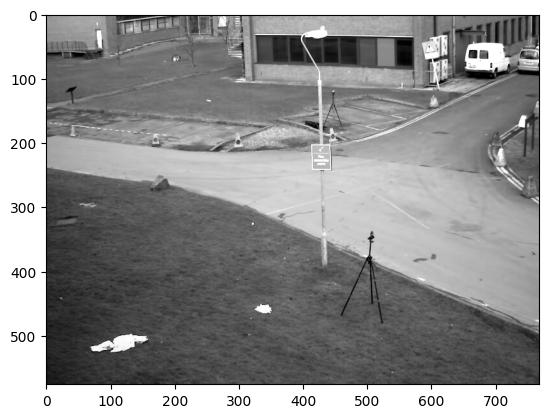

In [12]:
gray_frame_median = cv2.cvtColor(frame_median, cv2.COLOR_BGR2GRAY) #background
plt.imshow(ConvertColor(gray_frame_median))

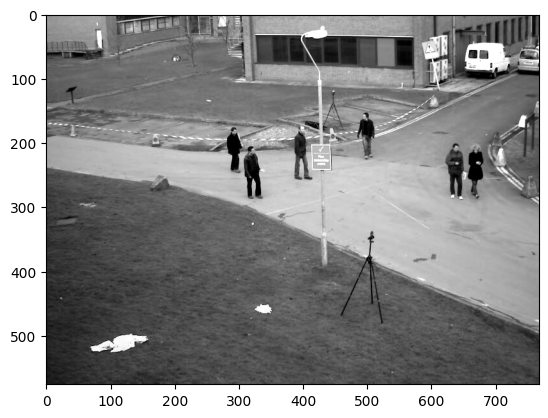

In [13]:
gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(ConvertColor(gray_frame))

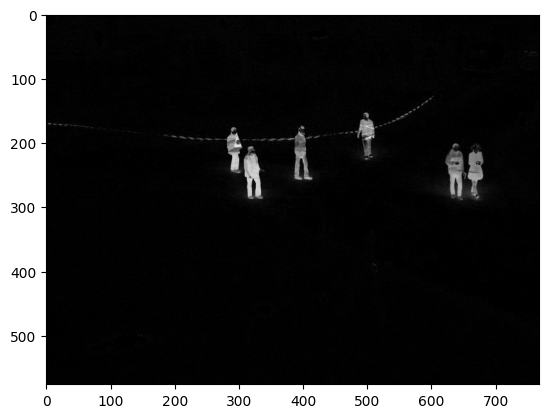

In [14]:
backgroung_removal_frame = cv2.absdiff(gray_frame, gray_frame_median)
plt.imshow(ConvertColor(backgroung_removal_frame))

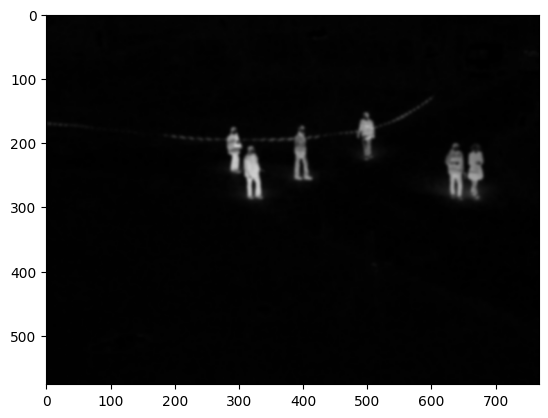

In [15]:
frame_blur = cv2.GaussianBlur(backgroung_removal_frame, (11,11), 0)
plt.imshow(ConvertColor(frame_blur))

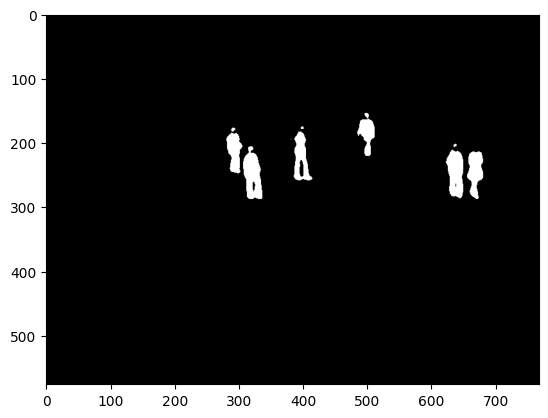

In [16]:
#binary image
ret, frame_threshold = cv2.threshold(frame_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(ConvertColor(frame_threshold))

In [17]:
(contours, _) = cv2.findContours(frame_threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

656 214 25 74
623 211 27 76
307 206 30 82
635 202 5 5
381 194 1 1
281 185 25 63
386 183 29 76
288 177 7 6
397 175 5 4
485 154 27 67


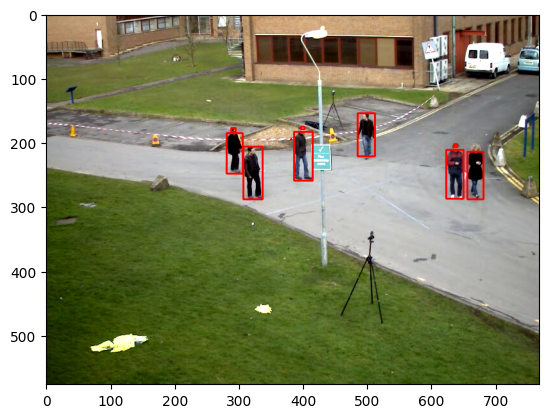

In [18]:
for i in contours:
    x,y, width, height = cv2.boundingRect(i)
    cv2.rectangle(frame, (x, y), (x+ width, y+height), (0,0,255), 2)
    print(x, y, width, height)
plt.imshow(ConvertColor(frame))